# <div class="text_cell_render border-box-sizing rendered_html">
<h2>Stroke Prediction</h2>

<h3>1) Introduction</h3>
<li>1.1. Importing Libraries</li>
<li>1.2. Importing Dataset</li>
<li>1.3. Missing Values</li>

<h3>2) Data Visualization</h3>
<li>2.1. Corr Heat Map</li>
<li>2.2. Count Plot</li>
<li>2.3. Distibution Plot</li>
<li>2.4. Scatter Plot</li>
<li>2.5. Violin Plot</li>
<li>2.6. Pair Plot</li>
    
<h3>3) Data Preprocessing</h3>
<li>3.1. Label Encoder</li>
<li>3.2. X and Y Splitting</li>
<li>3.3. Column Transformator and OneHotEncoder</li>
<li>3.4. Train Test Split</li>
<li>3.5. Smote</li>

<h3>4) Model Selection</h3>
<h3>5) Model Tuning</h3>
</div>

## 1) Introduction
#### 1.1 Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd
from tqdm import tqdm
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,matthews_corrcoef,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.neural_network import MLPClassifier

#### 1.2 Importing Dataset

In [2]:
df = pd.read_csv('C:/Users/MSI GF63/Desktop/SUPCOM/3emeannée/tuto/Stroke-Risk-Prediction-using-Machine-Learning-master/dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### 1.3 Missing Values

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

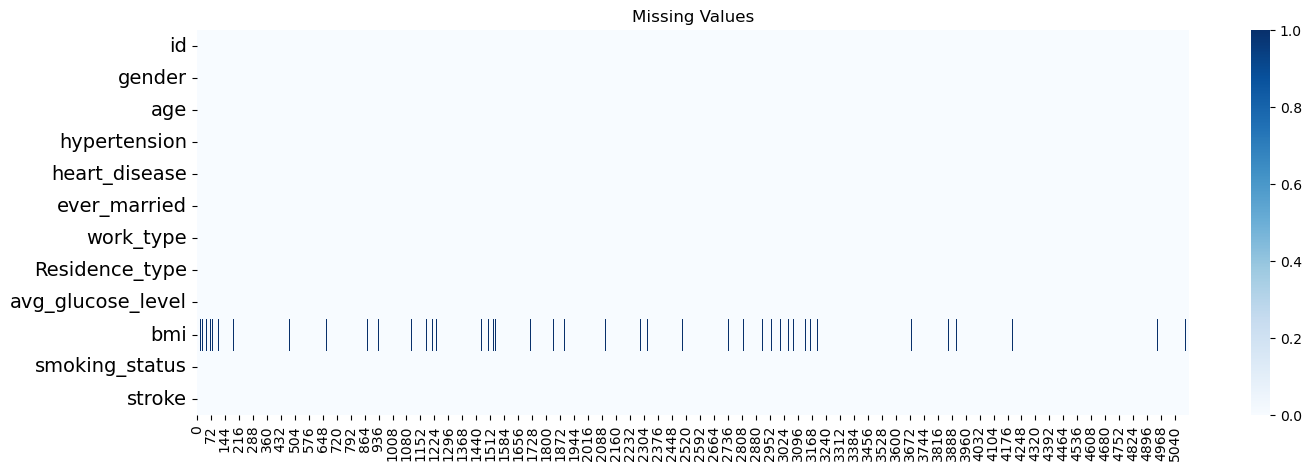

In [5]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values')

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

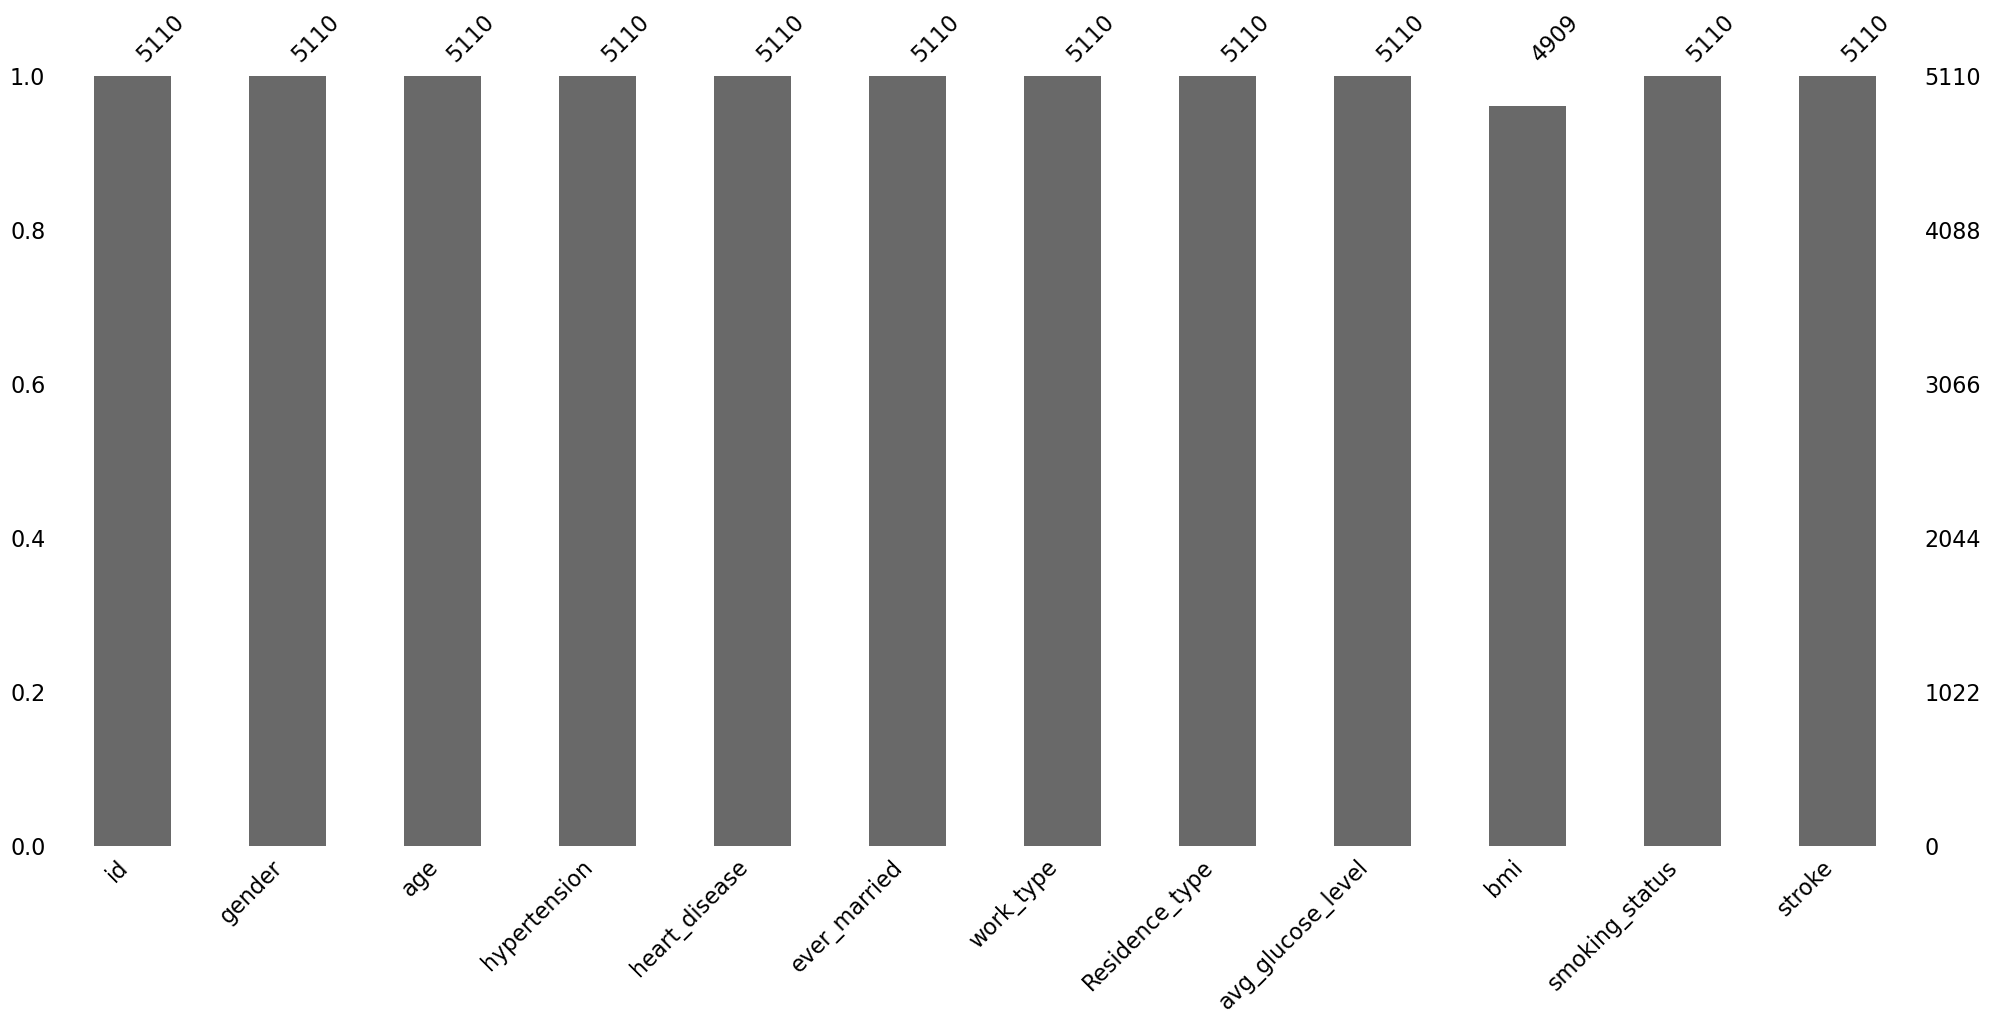

In [6]:
import missingno as msno
msno.bar(df)
plt.show()

In [7]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(),inplace=True)

In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 2. Data Visualization

<AxesSubplot:>

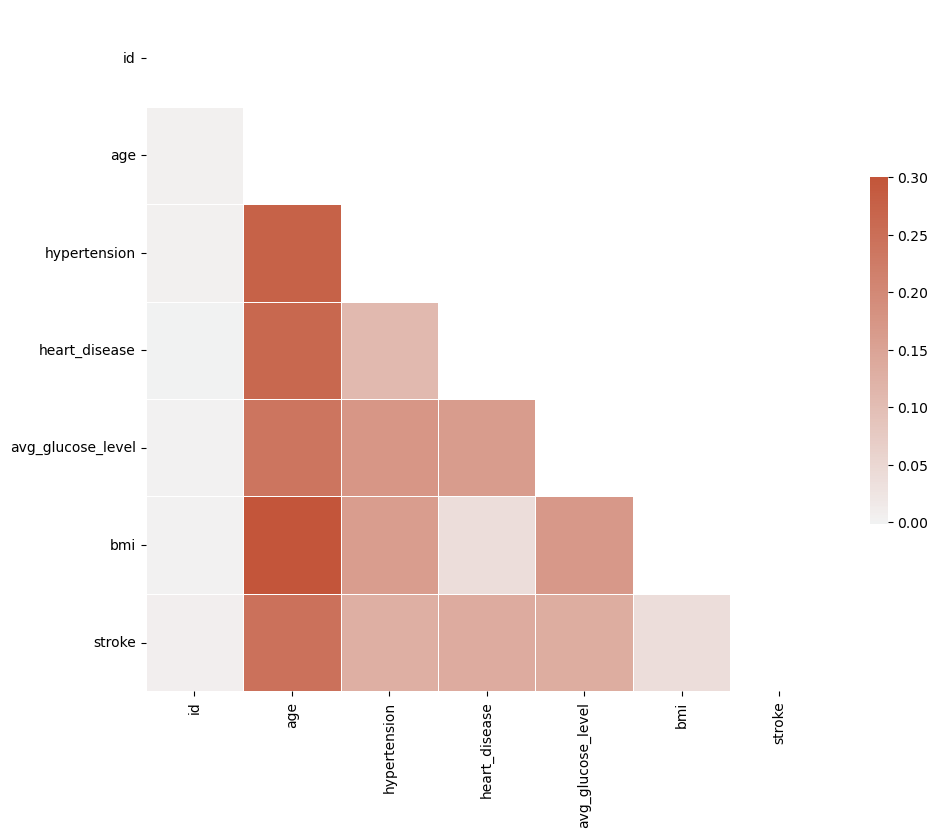

In [9]:
# compute the corr matrix

corr = df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#draw the heatpmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

In [10]:
# b=df.columns.values.tolist()
# b.remove('stroke')
# print(b)
# for i in b:
#     CrosstabResult=pd.crosstab(index=df[i],columns=df['stroke'])
    
# # Grouped bar chart between features and stroke
#     CrosstabResult.plot.bar(figsize=(15,7), rot=0)

(18.0, 100.0)

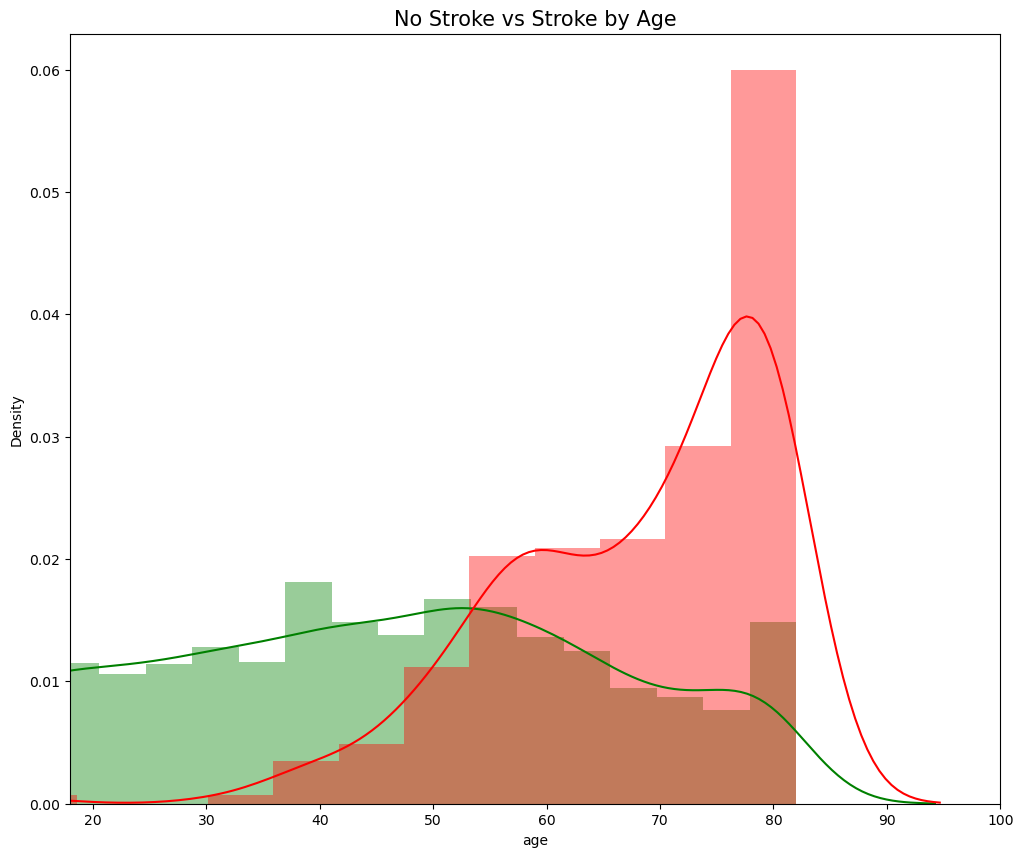

In [11]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke'] == 0]['age'],color='green')
sns.distplot(df[df['stroke'] == 1]['age'],color='red')
plt.title('No Stroke vs Stroke by Age',fontsize=15)
plt.xlim([18,100])

(30.0, 330.0)

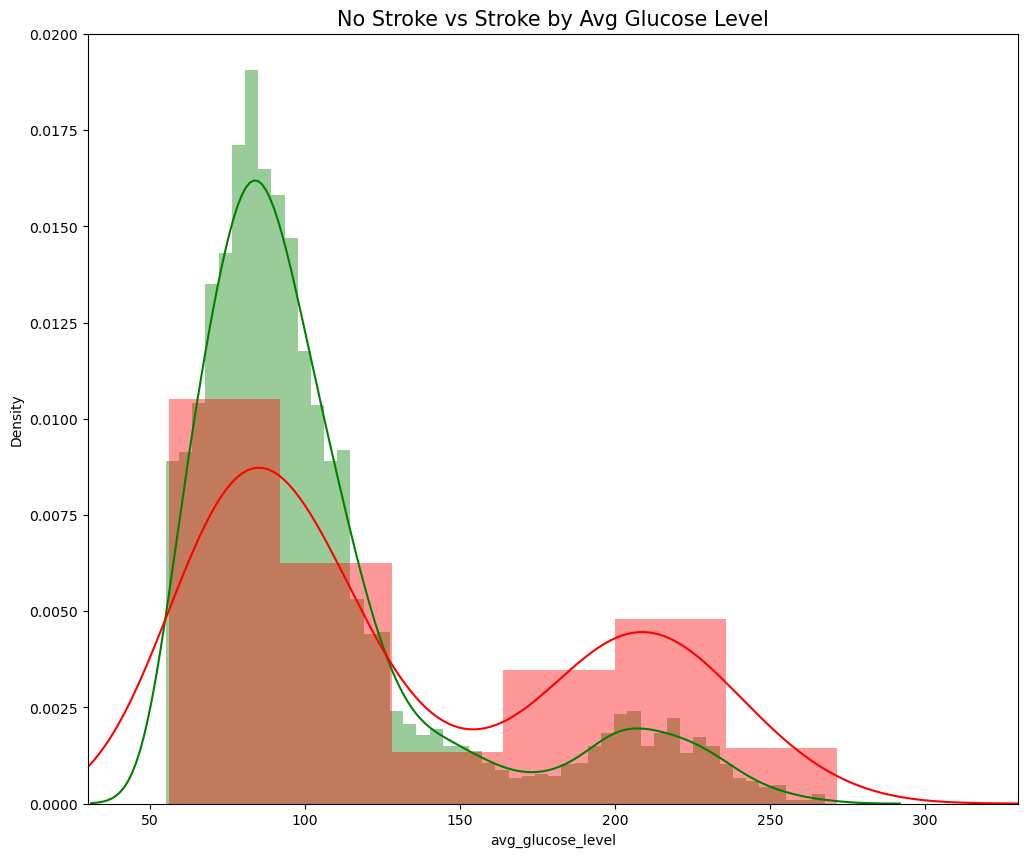

In [12]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke'] == 0]['avg_glucose_level'],color='green')
sns.distplot(df[df['stroke'] == 1]['avg_glucose_level'],color='red')
plt.title('No Stroke vs Stroke by Avg Glucose Level',fontsize=15)
plt.xlim([30,330])

#### 2.4 Scatter Plot

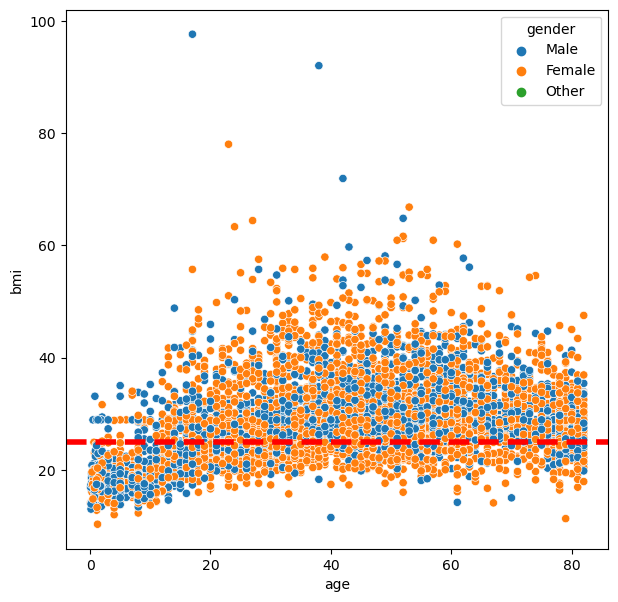

In [13]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df,x='age',y='bmi',hue='gender')
graph.axhline(y=25, linewidth=4,color='r',linestyle= '--')

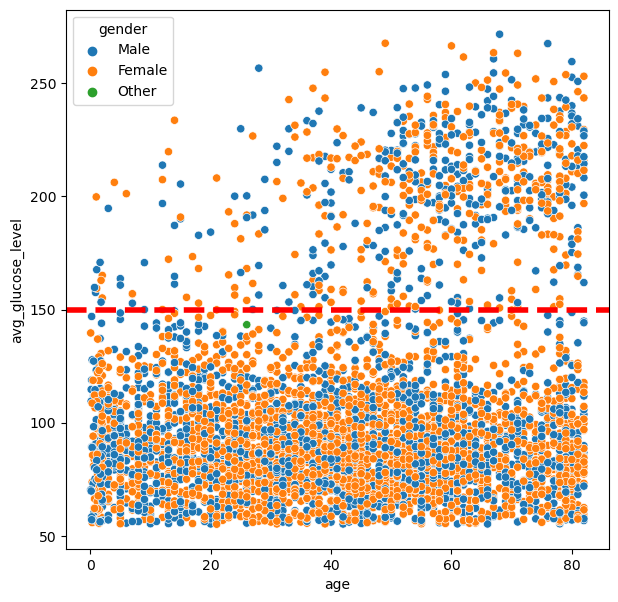

In [14]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df,x='age',y='avg_glucose_level',hue='gender')
graph.axhline(y=150,linewidth=4,color='r',linestyle='--')

(10.0, 100.0)

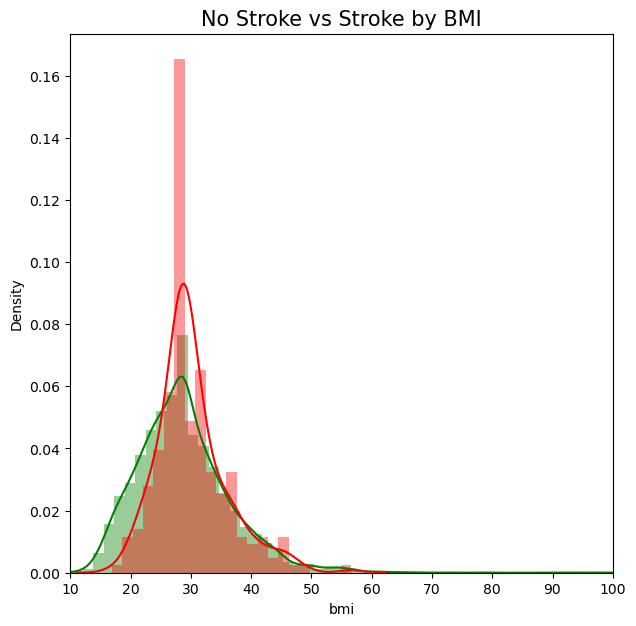

In [15]:
plt.figure(figsize=(7,7))
sns.distplot(df[df['stroke'] == 0]['bmi'],color='green')
sns.distplot(df[df['stroke'] == 1]['bmi'],color='red')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([10,100])

## 3. Data Preprocessing

In [16]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


#### 3.1 Label Encoder


In [17]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

#### 3.2 X and Y Splitting


In [18]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 10)
Y Shape (5110,)


#### 3.3 Column Transformator and OneHotEncoder 


In [19]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

#### 3.4 Train Test Split

In [20]:
X_train,X_test,y_train,y_test =train_test_split(x, y, train_size=0.3, random_state=42)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (1533, 19)
Number transations x_test df (3577, 19)
Number transations y_train df (1533,)
Number transations y_test df (3577,)


#### 3.5 Smote

In [21]:
# SMOTE 
# pip install imblearn
# from imblearn.over_sampling import SMOTE

print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 76
Before OverSampling, counts of label 0: 1457 



In [22]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (2914, 19)
After OverSampling, the shape of train_y: (2914,)
After OverSampling, counts of label 1: 1457
After OverSampling, counts of label 0: 1457


## 4. Model Selection

In [23]:
# models = []
# models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
# models.append(['Logistic Regression',LogisticRegression(random_state=0)])
# models.append(['SVM',SVC(random_state=0)])
# models.append(['KNeigbors',KNeighborsClassifier()])
# models.append(['GaussianNB',GaussianNB()])
# models.append(['BernoulliNB',BernoulliNB()])
# models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
# models.append(['RandomForest',RandomForestClassifier(random_state=0)])
# models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [24]:
# lst_1 = []
# for m in tqdm(range(len(models))):
#     lst_2 = []
#     model = models[m][1]
#     model.fit(X_train_res,y_train_res)
#     y_pred = model.predict(X_test)
#     cm = confusion_matrix(y_test,y_pred)
#     accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)

# # k-fOLD Validation
#     roc = roc_auc_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
#     recall = recall_score(y_test,y_pred)
#     f1 = f1_score(y_test,y_pred)
#     print(models[m][0],':')
#     print(cm)
#     print('Accuracy Score: ',accuracy_score(y_test,y_pred))
#     print('')
#     print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
#     print('')
#     print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
#     print('')
#     print('ROC AUC Score: {:.2f} %'.format(roc))
#     print('')
#     print('Precision: {:.2f} %'.format(precision))
#     print('')
#     print('Recall: {:.2f} %'.format(recall))
#     print('')
#     print('F1 Score: {:.2f} %'.format(f1))
#     print('-'*40)
#     print('')
#     lst_2.append(models[m][0])
#     lst_2.append(accuracy_score(y_test,y_pred)*100)
#     lst_2.append(accuracies.mean()*100)
#     lst_2.append(accuracies.std()*100)
#     lst_2.append(roc)
#     lst_2.append(precision)
#     lst_2.append(recall)
#     lst_2.append(f1)
#     lst_1.append(lst_2)

In [25]:
# df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

# df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
# df2

# # COMPARE

In [26]:
# sns.barplot(x='Accuracy',y='Model',data=df2,color='b')
# plt.title('Model Compare Graphic');

## 5. Model Tuning

In [27]:
grid_models = [(XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [28]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_res,y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(best_param)
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print('')
    print('-'*25)
    print('')

{'eval_metric': 'error', 'learning_rate': 0.05}
 XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None): 
 Best Accuracy: 96.92 %

-------------------------

{'metric': 'manhattan', 'n_neighbors': 5}
 KNeighborsClassifier(): 
 Best Accuracy: 90.53 %

-------------------------

{'criterion': 'entropy', 'random_state': 0}
 DecisionTreeClassifier(): 
 Best Accuracy: 94.

# XGBOOST 

In [29]:
xgb = XGBClassifier(eval_metric= 'error',
                           learning_rate= 0.05
                          )

xgb.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Training set performance
xgb_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
xgb_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
xgb_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
xgb_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
xgb_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
xgb_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % xgb_train_accuracy)
print('- MCC: %s' % xgb_train_mcc)
print('- F1 score: %s' % xgb_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy needed: %s' % xgb_test_accuracy)
print('- MCC: %s' % xgb_test_mcc)
print('- F1 score: %s' % xgb_test_f1)

Model performance for Training set
- Accuracy: 0.9680365296803652
- MCC: 0.5862628513261273
- F1 score: 0.9606978629351787
----------------------------------
Model performance for Test set
- Accuracy needed: 0.9480011182555214
- MCC: 0.037308583878053046
- F1 score: 0.9277225097793147


# RANDOMFOREST

In [30]:
rf = RandomForestClassifier(criterion='entropy',
                                      n_estimators=200,
                                      random_state= 0
                                     )

rf.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy needed: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy needed: 0.950796757058988
- MCC: -0.006531480418032484
- F1 score: 0.9276331788560607


# DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier(criterion='entropy',
                                      random_state= 0
                                     )

dt.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy needed: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)


Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy needed: 0.9083030472462957
- MCC: 0.06066347825964408
- F1 score: 0.9108953494407539


# Neural network




In [32]:

mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Training set performance
mlp_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
mlp_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
mlp_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
mlp_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
mlp_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
mlp_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % mlp_train_accuracy)
print('- MCC: %s' % mlp_train_mcc)
print('- F1 score: %s' % mlp_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy needed: %s' % mlp_test_accuracy)
print('- MCC: %s' % mlp_test_mcc)
print('- F1 score: %s' % mlp_test_f1)

Model performance for Training set
- Accuracy: 0.9504240052185258
- MCC: 0.0
- F1 score: 0.9262660706377204
----------------------------------
Model performance for Test set
- Accuracy needed: 0.9516354487000279
- MCC: 0.0
- F1 score: 0.9280524473212707


# Build Stacked model


In [33]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('xgb',xgb),
    ('dt',dt),
    ('rf',rf),
    ('mlp',mlp) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy needed: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.95955642530985
- MCC: 0.42034715334269634
- F1 score: 0.9460471479307095
----------------------------------
Model performance for Test set
- Accuracy needed: 0.9516354487000279
- MCC: 0.0
- F1 score: 0.9280524473212707


In [34]:
model = {
'xgb':'xgb',
'dtc': 'dtc',
'rf': 'rf',
'mlp': 'mlp',
'stack': 'stack_model'
}

acc_test_list = {
'xgb':xgb_test_accuracy,
'dtc': dt_test_accuracy,
'rf': rf_test_accuracy,
'mlp': mlp_test_accuracy,
'stack': stack_model_train_accuracy}

mcc_train_list = {
'xgb':xgb_train_mcc,
'dtc': dt_train_mcc,
'rf': rf_train_mcc,
'mlp': mlp_train_mcc,
'stack': stack_model_train_mcc}

f1_train_list = {
'xgb':xgb_train_f1,
'dtc': dt_train_f1,
'rf': rf_train_f1,
'mlp': mlp_train_f1,
'stack': stack_model_train_f1}

In [35]:
mcc_train_list

{'xgb': 0.5862628513261273,
 'dtc': 1.0,
 'rf': 1.0,
 'mlp': 0.0,
 'stack': 0.42034715334269634}

In [36]:
acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
model_df = pd.DataFrame.from_dict(model, orient='index', columns=['Model'])

df = pd.concat([model_df,acc_df, mcc_df, f1_df], axis=1)
df = df.reset_index()
df

,index,Model,Accuracy,MCC,F1
0,xgb,xgb,0.948001,0.586263,0.960698
1,dtc,dtc,0.908303,1.000000,1.000000
2,rf,rf,0.950797,1.000000,1.000000
3,mlp,mlp,0.951635,0.000000,0.926266
4,stack,stack_model,0.959556,0.420347,0.946047


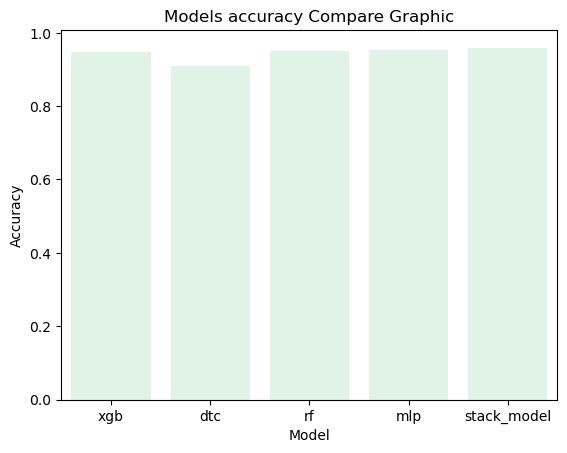

In [37]:
sns.barplot(x='Model',y='Accuracy',data=df,color='#DEF5E5')
plt.title('Model''s accuracy Compare Graphic');